In [1]:
import pickle
import os
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import folium


In [2]:
# Change the path to the file location.
file_path = "../Data/Graph Neural Network Data/Adjacency Matrix/adj_mx.pkl"

# Check if the file exists.
if not os.path.exists(file_path):
  raise FileNotFoundError(f"File {file_path} does not exist.")

In [3]:
# Load the adjacency matrix from the file.
with open(file_path, "rb") as f:
  adjacency_matrix = pickle.load(f)


In [7]:
# Print the shape of the adjacency matrix.
print(adjacency_matrix.shape)

# Print the first 5 rows of the adjacency matrix.
print(adjacency_matrix[:5])

(21, 21)
         0         1         2         3         4         5         6   \
0  0.000000  0.288659  0.607625  0.690711  0.855315  0.754574  0.562399   
1  0.288659  0.000000  0.311802  0.208208  0.249803  0.219417  0.468522   
2  0.607625  0.311802  0.000000  0.439247  0.539370  0.497118  0.454896   
3  0.690711  0.208208  0.439247  0.000000  0.805374  0.877004  0.432141   
4  0.855315  0.249803  0.539370  0.805374  0.000000  0.878349  0.501822   

         7         8         9   ...        11        12        13        14  \
0  0.575643  0.752576  0.825606  ...  0.844787  0.777946  0.676710  0.896038   
1  0.223240  0.268760  0.241642  ...  0.245848  0.304948  0.423723  0.258653   
2  0.349954  0.459171  0.524013  ...  0.538270  0.490970  0.567119  0.578133   
3  0.692681  0.750569  0.833199  ...  0.811504  0.672999  0.489980  0.754674   
4  0.627528  0.785607  0.965262  ...  0.982134  0.753339  0.589147  0.932895   

         15        16        17        18        19        

In [6]:
adjacency_matrix = np.array(adjacency_matrix)

In [7]:
print(adjacency_matrix.shape)
print(adjacency_matrix[:5])

(21, 21)
[[0.         0.28865948 0.60762537 0.690711   0.85531539 0.75457353
  0.56239928 0.57564274 0.75257591 0.82560595 0.24756458 0.84478656
  0.77794645 0.67670998 0.89603797 0.48885884 0.85214379 0.3723859
  0.46785112 0.76662797 0.62458714]
 [0.28865948 0.         0.31180222 0.20820761 0.24980285 0.21941703
  0.46852204 0.22323991 0.26876042 0.24164169 0.28337006 0.24584812
  0.30494826 0.42372259 0.25865333 0.31439055 0.25104856 0.18886474
  0.262676   0.31727814 0.33181515]
 [0.60762537 0.31180222 0.         0.43924684 0.53937014 0.49711805
  0.45489599 0.34995441 0.45917148 0.52401282 0.17594235 0.53827006
  0.49097017 0.56711905 0.57813335 0.32390738 0.53187448 0.22867102
  0.29673749 0.49351371 0.41332137]
 [0.690711   0.20820761 0.43924684 0.         0.80537392 0.87700372
  0.43214142 0.69268132 0.75056927 0.83319891 0.23374568 0.81150398
  0.67299905 0.48998045 0.75467404 0.46833673 0.81053601 0.44257446
  0.49063398 0.64661476 0.56045419]
 [0.85531539 0.24980285 0.539370

In [32]:
# Load the station names and locations.
stations_df = pd.read_csv('../Data/Stations_gps.csv')

In [33]:
stations_df

,Name,Latitude,Longitude
0,ATLANTIS,-33.6100,18.4800
1,CALVINIA WO,-31.4800,19.7600
2,CAPE COLUMBINE,-32.8300,17.8600
3,CAPE POINT,-34.3500,18.4900
4,CAPE TOWN - ROYAL YACHT CLUB,-33.9200,18.4400
5,CAPE TOWN SLANGKOP,-34.1500,18.3200
6,EXCELSIOR CERES,-32.9600,19.4300
7,HERMANUS,-34.4300,19.2200
8,JONKERSHOEK,-33.9700,18.9200
9,KIRSTENBOSCH,-33.9900,18.4300


In [35]:
# Display weather stations on a map.
map_new=folium.Map()
for i in stations_df.index:
    map_new.add_child(folium.Marker(location=[stations_df['Latitude'][i],stations_df['Longitude'][i]],
                            popup=stations_df['Name'][i],icon=folium.Icon(color='red'))
                            # Display the index number of the station over the marker icon by default.
                            .add_child(folium.Tooltip(i))
                            # Display comment like box with index number of the station by default.
                            # .add_child(folium.Comment(i))
    )
# map_new.save('map_igra_stations.html')
map_new

<Axes: >

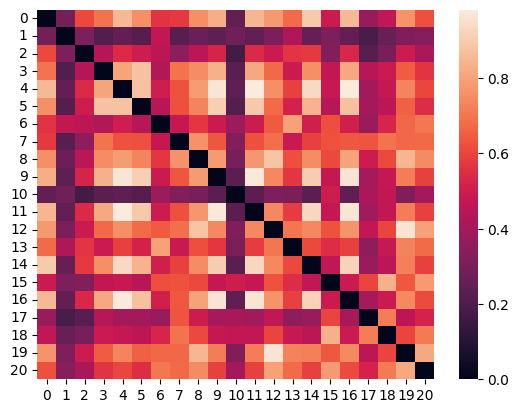

In [8]:
# Pre-defined adjacency matrix
sns.heatmap(adjacency_matrix)

#### Visual Analysis of spatial-temporal dependencies for horizon 3

In [11]:
# Walk-forward split 0 adjacency matrix
split_0_adj = pd.read_csv("../Results/GWN/3 Hour Forecast/Matrices/adjacency_matrix_0.csv")
split_0_adj = split_0_adj.drop(['Unnamed: 0'], axis=1)
split_0_adj 

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.011239,0.011239,0.011239,0.011239,0.022057,0.011239,0.033244,0.011239,0.077529,0.011239,...,0.011239,0.059282,0.690430,0.015484,0.011239,0.011239,0.015176,0.014192,0.047849,0.019341
1,0.016897,0.016897,0.017193,0.016897,0.016897,0.016897,0.018490,0.017116,0.037976,0.016897,...,0.214499,0.016897,0.133552,0.016897,0.016897,0.016897,0.035269,0.016897,0.021707,0.017863
2,0.025315,0.078961,0.179633,0.033121,0.017468,0.017468,0.074650,0.017468,0.133812,0.017468,...,0.310064,0.017468,0.017468,0.031237,0.018948,0.017468,0.017468,0.017468,0.040326,0.017468
3,0.028090,0.015933,0.076059,0.352152,0.221692,0.015933,0.015933,0.015933,0.015933,0.018301,...,0.015933,0.029940,0.015933,0.015933,0.020190,0.015933,0.021033,0.015933,0.015933,0.150448
4,0.039320,0.025358,0.025358,0.025358,0.051949,0.081414,0.025358,0.025358,0.025358,0.025358,...,0.025358,0.104837,0.370063,0.025358,0.025358,0.025358,0.025358,0.041066,0.025358,0.034263
5,0.044187,0.029340,0.089814,0.116077,0.029340,0.083524,0.038194,0.029340,0.035542,0.029340,...,0.061380,0.030609,0.029340,0.029340,0.029340,0.029340,0.091493,0.029340,0.029340,0.064155
6,0.006871,0.003029,0.002979,0.165731,0.821529,0.002979,0.002979,0.002979,0.002979,0.002979,...,0.002979,0.034286,0.006790,0.002979,0.002979,0.003814,0.002979,0.002979,0.002979,0.037443
7,0.018163,0.018163,0.018163,0.018163,0.115350,0.087430,0.018163,0.307649,0.018163,0.079807,...,0.018163,0.023014,0.018163,0.018163,0.038594,0.018163,0.018163,0.034725,0.018163,0.055759
8,0.095090,0.083922,0.011308,0.416169,0.169353,0.125107,0.011308,0.011308,0.011308,0.011308,...,0.011308,0.043920,0.011308,0.011308,0.011308,0.026339,0.011308,0.011308,0.011308,0.011308
9,0.041999,0.036632,0.065602,0.113789,0.036632,0.036632,0.036632,0.073102,0.036632,0.061858,...,0.036632,0.036632,0.036632,0.036632,0.159411,0.066670,0.036632,0.036632,0.036632,0.059571


<Axes: >

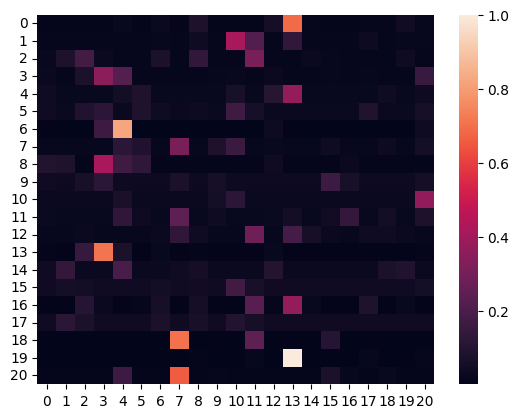

In [12]:
sns.heatmap(split_0_adj)

In [13]:
# Walk-forward split 0 Temperature values
# read pickle file into split_0_temp
split_0_temp = pd.read_pickle(".././Results/GWN/3 Hour Forecast/Targets/targets_0.pkl")

In [21]:
split_0_temp[0][0][0]

array([[0.47346938, 0.47142857, 0.4632653 ],
       [0.39795917, 0.4       , 0.4       ],
       [0.422449  , 0.43265307, 0.42857143],
       [0.44693878, 0.46530613, 0.4755102 ],
       [0.4387755 , 0.49591836, 0.5122449 ],
       [0.41428572, 0.43061224, 0.44489795],
       [0.4       , 0.41020408, 0.40408164],
       [0.5102041 , 0.49387756, 0.4755102 ],
       [0.4367347 , 0.43469387, 0.43265307],
       [0.4979592 , 0.5040816 , 0.4979592 ],
       [0.5040816 , 0.5244898 , 0.5102041 ],
       [0.45714286, 0.45510203, 0.46734694],
       [0.49591836, 0.49387756, 0.4877551 ],
       [0.46734694, 0.46938777, 0.47346938],
       [0.41020408, 0.39795917, 0.41836736],
       [0.5408163 , 0.544898  , 0.5346939 ],
       [0.45510203, 0.49387756, 0.53061223],
       [0.48979592, 0.49183673, 0.477551  ],
       [0.55510205, 0.55306125, 0.5285714 ],
       [0.4612245 , 0.4632653 , 0.46530613],
       [0.4877551 , 0.48979592, 0.4877551 ]], dtype=float32)

#### Create adjacency matrix using Euclidean distance between two weather stations according to their gps location and apply Threshold Guassian kernel

In [10]:
# Define the function to calculate the Euclidean distance between two points.
def euclidean_distance(lat1, lon1, lat2, lon2):
  """
  Calculates the Euclidean distance between two points.

  Args:
    lat1: The latitude of the first station.
    lon1: The longitude of the first station.
    lat2: The latitude of the second station.
    lon2: The longitude of the second statio

  Returns:
    The Euclidean distance between the two points.
  """

  return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

In [11]:
# Load weather stations locations csv file.
new_adj_file_path = "../Data/Graph Neural Network Data/Adjacency Matrix/new/stations_locations.csv"
# Load the weather stations and their GPS coordinates.
stations = pd.read_csv(new_adj_file_path)

In [12]:
stations

,StasName,Latitude,Longitude
0,ATLANTIS,-33.6100,18.4800
1,CALVINIA WO,-31.4800,19.7600
2,CAPE COLUMBINE,-32.8300,17.8600
3,CAPE POINT,-34.3500,18.4900
4,CAPE TOWN - ROYAL YACHT CLUB,-33.9200,18.4400
5,CAPE TOWN SLANGKOP,-34.1500,18.3200
6,EXCELSIOR CERES,-32.9600,19.4300
7,HERMANUS,-34.4300,19.2200
8,JONKERSHOEK,-33.9700,18.9200
9,KIRSTENBOSCH,-33.9900,18.4300


In [13]:
with open('csv_file.csv', 'w') as f:
  for i in range(len(stations)):
      for j in range(len(stations)):
          writer = csv.writer(f)
          writer.writerow(
              [
                  stations.loc[i, "Latitude"],
                  stations.loc[i, "Longitude"],
                  stations.loc[j, "Latitude"],
                  stations.loc[j, "Longitude"],
              ]
          )

In [14]:
# Calculate the Euclidean distance between all pairs of weather stations.
d_adj_matrix = np.zeros((len(stations), len(stations)))
for i in range(len(stations)):
  for j in range(len(stations)):
    d_adj_matrix[i, j] = euclidean_distance(stations.loc[i, "Latitude"], stations.loc[i, "Longitude"], stations.loc[j, "Latitude"], stations.loc[j, "Longitude"])


In [15]:
d_adj_matrix.shape

(21, 21)

In [16]:
# Print the adjacency matrix.
print(d_adj_matrix[:1])

[[0.         2.48501509 0.9963935  0.74006756 0.31256999 0.56320511
  1.15108644 1.1045361  0.56850682 0.38327536 2.79216762 0.33734256
  0.50219518 0.78102497 0.21954498 1.43136299 0.32       1.97564917
  1.51921032 0.53150729 0.94132885]]


In [18]:
np.max(d_adj_matrix)

3.475197836095091

In [19]:
print(d_adj_matrix[:1])

[[0.         2.48501509 0.9963935  0.74006756 0.31256999 0.56320511
  1.15108644 1.1045361  0.56850682 0.38327536 2.79216762 0.33734256
  0.50219518 0.78102497 0.21954498 1.43136299 0.32       1.97564917
  1.51921032 0.53150729 0.94132885]]


### Thresholded Gaussian kernel
#### Paper: [The Emerging Field of Signal Processing on Graphs](https://ieeexplore.ieee.org/abstract/document/6494675/)

<img src="img/Gaussian.png" alt="Threshold Gaussian kernel" height="300"/>

In [20]:
def thresholded_gaussian_kernel (distance_matrix):
    """
    Thresholds the Gaussian kernel.
    
    Returns:
        The thresholded Gaussian kernel.
    """
    
    # Threshold Gaussian kernel.
    sigma = 10
    for i in range(len(distance_matrix)):
        for j in range(len(distance_matrix)):
            if distance_matrix[i, j] != 0. :
                distance_matrix[i, j] = np.exp(-distance_matrix[i, j]**2 / (2 * sigma**2))
    
    return d_adj_matrix

In [21]:
d_adj_matrix = thresholded_gaussian_kernel(d_adj_matrix)

In [22]:
d_adj_matrix[:1]

array([[0.        , 0.96959531, 0.9950483 , 0.99726525, 0.99951162,
        0.99841526, 0.9933969 , 0.99391857, 0.99838531, 0.99926577,
        0.96176898, 0.99943116, 0.99873979, 0.99695465, 0.99975903,
        0.98980829, 0.99948813, 0.98067326, 0.98852633, 0.9985885 ,
        0.9955793 ]])

In [28]:
# 2nd smallest value 
np.partition(d_adj_matrix, 1)[1][1]

0.9459558433401123

In [29]:
d_adj_matrix.shape

(21, 21)

In [31]:
# Write the adjacency matrix to pickle file.
new_adj_file_path = "../Data/Graph Neural Network Data/Adjacency Matrix/new/adj_matrix.pkl"
with open(new_adj_file_path, "wb") as f:
  pickle.dump(d_adj_matrix, f)

In [32]:
# Load the adjacency matrix from the file.
with open(new_adj_file_path, "rb") as f:
  load_d_adj_matrix = pickle.load(f)

In [33]:
# Print the shape of the adjacency matrix.
print(load_d_adj_matrix.shape)

# Print the first 5 rows of the adjacency matrix.
print(load_d_adj_matrix[:5])

(21, 21)
[[0.         0.96959531 0.9950483  0.99726525 0.99951162 0.99841526
  0.9933969  0.99391857 0.99838531 0.99926577 0.96176898 0.99943116
  0.99873979 0.99695465 0.99975903 0.98980829 0.99948813 0.98067326
  0.98852633 0.9985885  0.9955793 ]
 [0.96959531 0.         0.97320308 0.95194407 0.96225095 0.95503002
  0.98856933 0.95602568 0.96606081 0.96045802 0.96869788 0.96139445
  0.97218564 0.9853617  0.96408819 0.97357686 0.96251609 0.94595584
  0.96488872 0.97398731 0.97595383]
 [0.9950483  0.97320308 0.         0.98655471 0.99240648 0.99027757
  0.98766767 0.97819328 0.9879571  0.99168229 0.94140202 0.99235636
  0.98993004 0.99358665 0.99401299 0.97490427 0.99205969 0.95739398
  0.97091146 0.99007508 0.98450874]
 [0.99726525 0.95194407 0.98655471 0.         0.99906344 0.99965556
  0.98602014 0.99730713 0.99835485 0.99933422 0.95862578 0.99912788
  0.99686841 0.98987313 0.99841675 0.98855747 0.99911789 0.98679863
  0.98991074 0.99620522 0.99331743]
 [0.99951162 0.96225095 0.99240